In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = '/media/sf_repo/kdd2/image/'


In [3]:
def rgb2gray(rgb):
#    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return np.dot(rgb[...,:3], [0.2125, 0.7154, 0.0721])


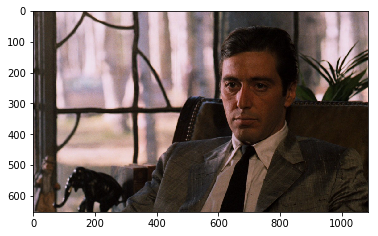

In [4]:
img = mpimg.imread(path + 'michael-corleone2.png',0)
imgplot = plt.imshow(img)

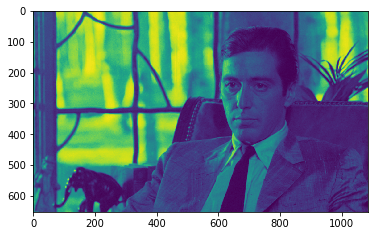

In [5]:
gray = rgb2gray(img)    
imgplot = plt.imshow(gray)

In [127]:
print('Original', img.shape)
print('PB', gray.shape)

Original (652, 1086, 3)
PB (652, 1086)


In [91]:
u, s, v = np.linalg.svd(gray, full_matrices=False)


In [92]:
print('Check', np.allclose(gray, np.dot(u * s, v[:u.shape[0],:])))

Check True


In [93]:
print ('Shape U->', u.shape)
print ('Shape S->', s.shape)
print ('Shape V->', v.shape)

Shape U-> (652, 652)
Shape S-> (652,)
Shape V-> (652, 1086)


In [128]:
def reduction(threesold = 0.8):
    energy = 0
    energy_total = np.sum(s)
    for i in range(0,s.shape[0]):
        energy += s[i] 
        if energy / energy_total >= threesold:
            return i

In [134]:
sizes =  [0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.99999999999]
redux = []

for z in sizes:
    redux.append(reduction(z))


In [135]:
for i in range(0,len(redux)):
    print('Proportion:', sizes[i], 'SV:' , redux[i])


Proportion: 0.4 SV: 3
Proportion: 0.5 SV: 7
Proportion: 0.6 SV: 15
Proportion: 0.7 SV: 28
Proportion: 0.75 SV: 37
Proportion: 0.8 SV: 50
Proportion: 0.85 SV: 71
Proportion: 0.9 SV: 109
Proportion: 0.95 SV: 198
Proportion: 0.99 SV: 399
Proportion: 0.99999999999 SV: 651


In [136]:
recimg = []
svds = []
for e in redux:
    ss = np.concatenate((s[:e], np.zeros(s.shape[0] - e)))
    svds.append(ss)
    recimg.append(np.dot(u * ss, v))

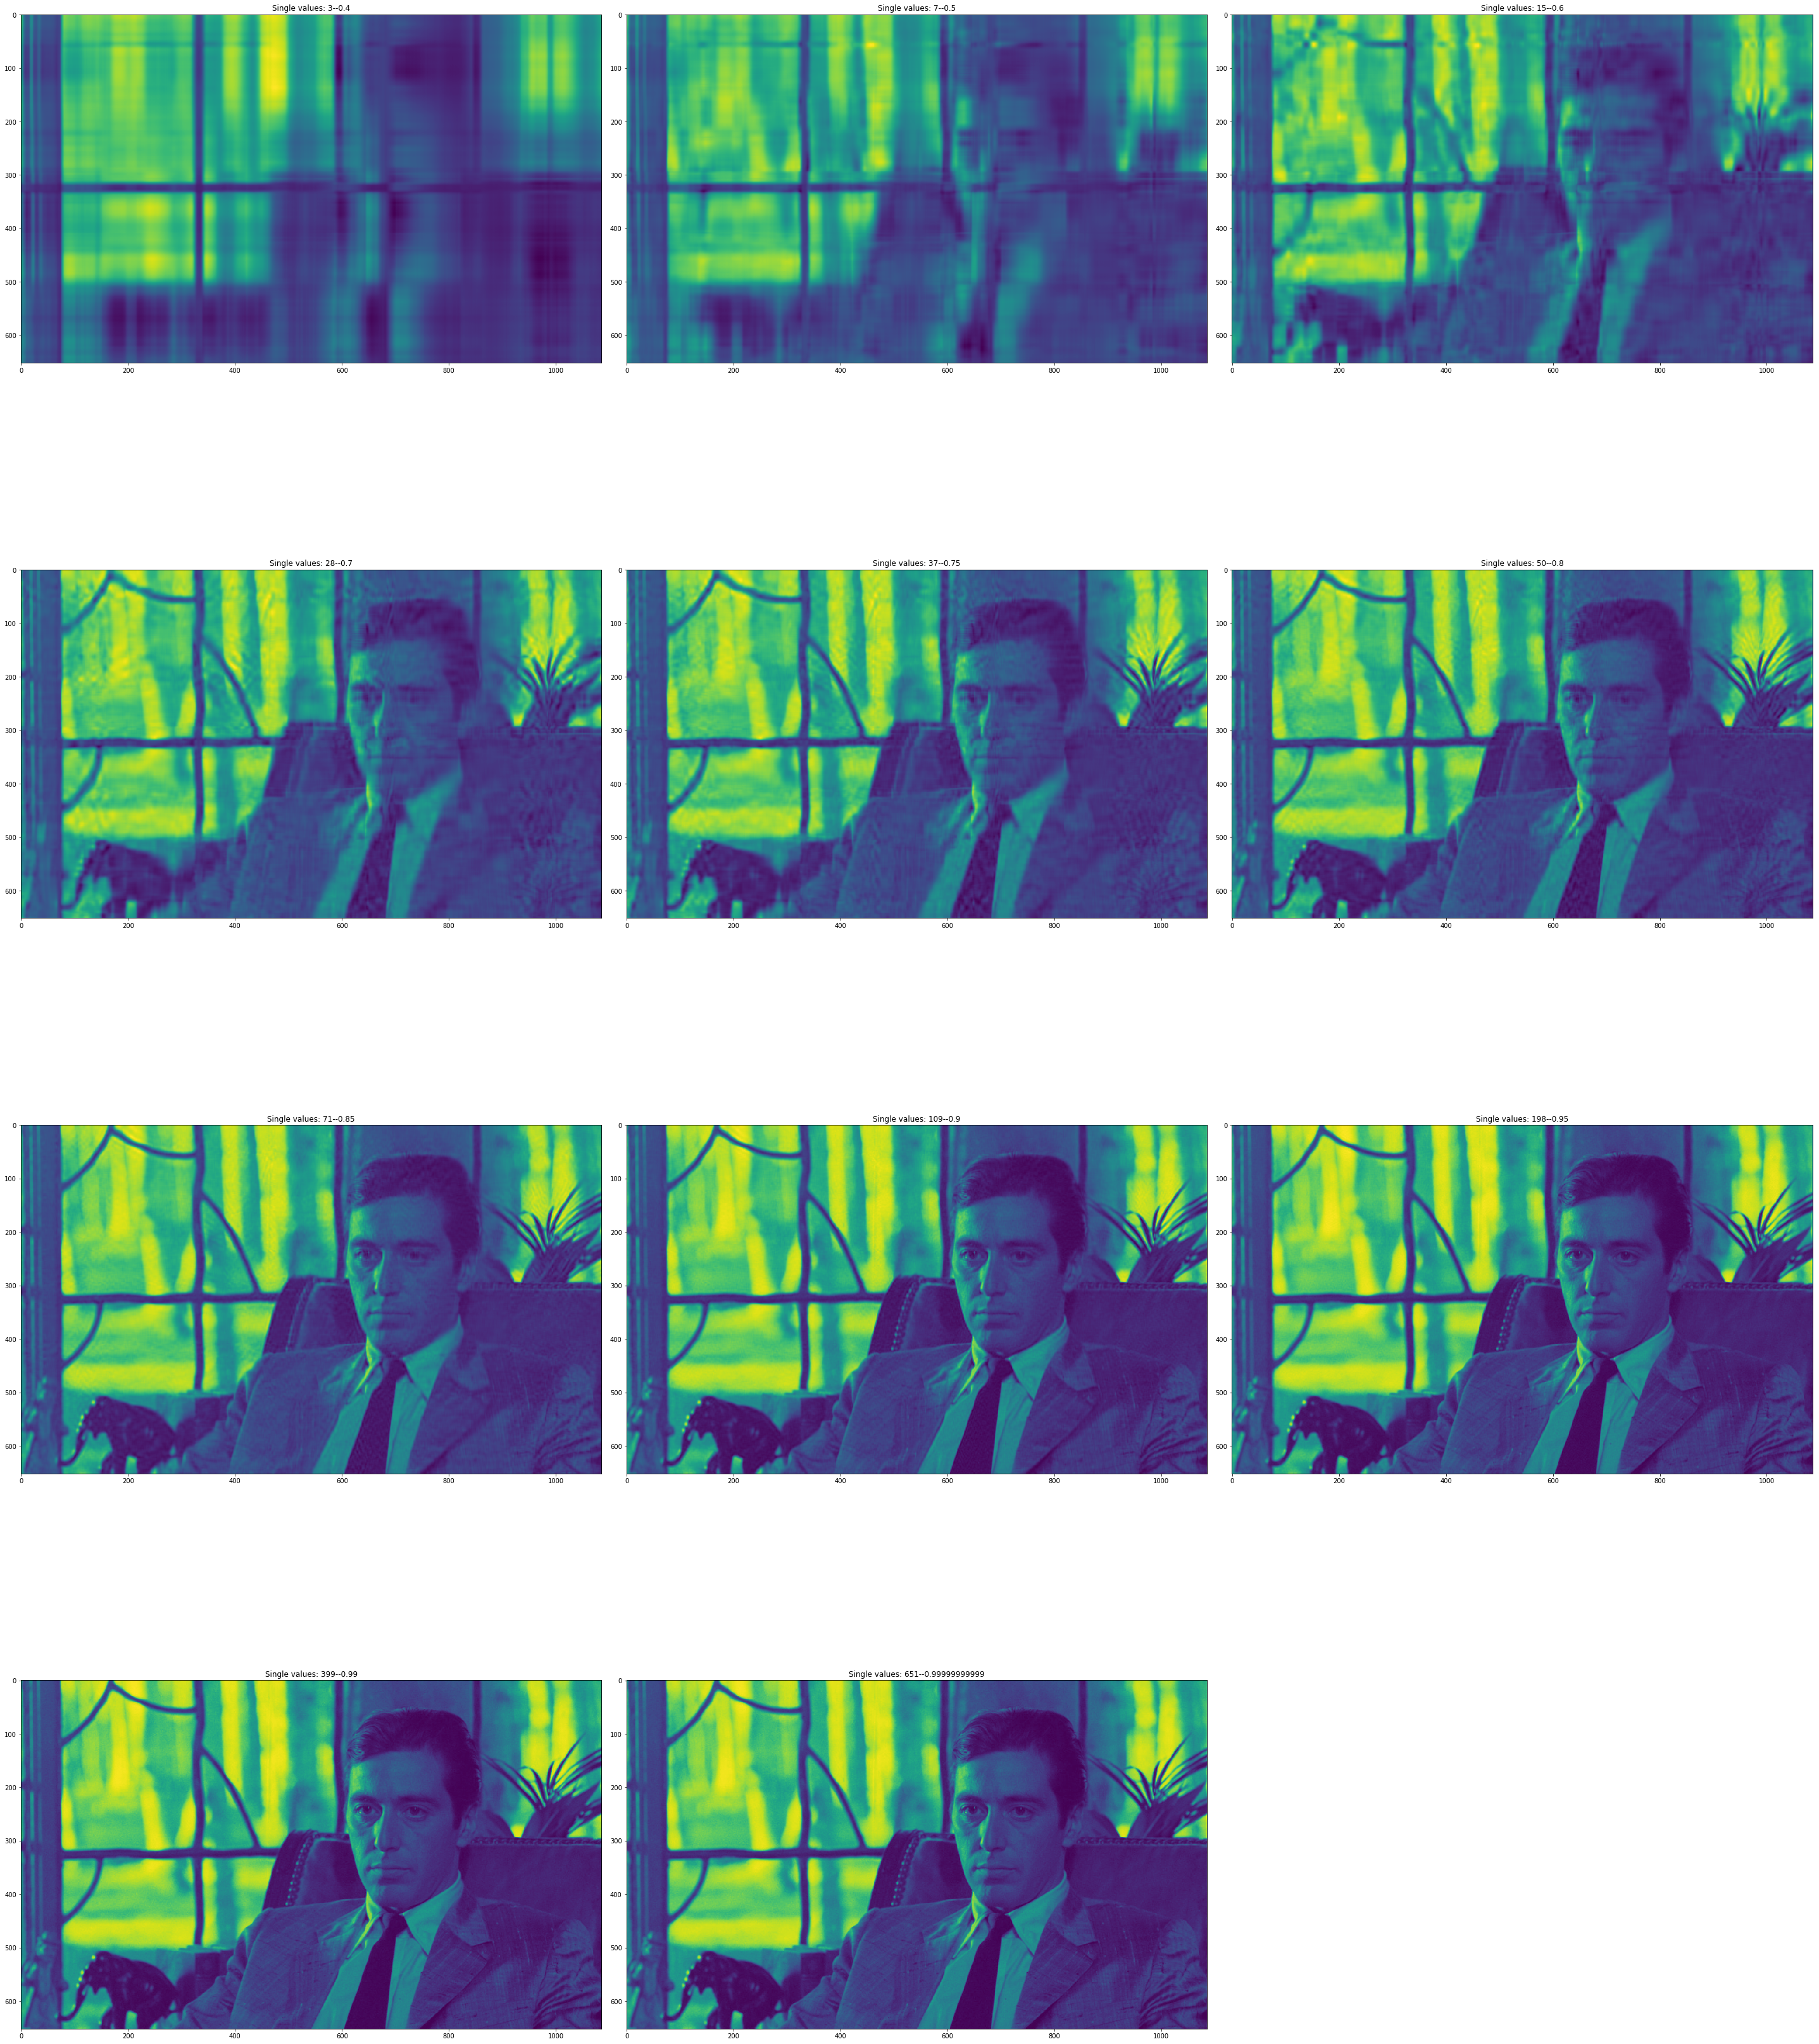

In [137]:
fig=plt.figure(figsize=(40, 50))
columns = 3
rows = int(len(recimg) / columns) + 1 
for j in range(0, len(recimg)):
    f = fig.add_subplot(rows, columns, j+1)
    f.title.set_text('Single values: ' + str(redux[j]) + '--' +  str(sizes[j]))
    plt.imshow(recimg[j])
plt.tight_layout(True)
plt.show()

In [126]:
svds[7]

array([87245.05349337, 22362.47704581, 13174.94883436,  9863.34340691,
        7762.62137742,  7105.89816218,  6763.42826402,  5950.47398108,
        5153.69495688,  4552.13314219,  4311.51546655,  3720.36190719,
        3670.23639068,  3552.19968206,  3359.62266218,  3238.60654092,
        3147.99866624,  3042.73700154,  3001.62328406,  2897.22831914,
        2764.95560878,  2591.83770339,  2517.34358426,  2416.13415165,
        2268.15585251,  2201.10293618,  2091.09546129,  2005.61011312,
        1908.56385459,  1872.52381658,  1837.0535454 ,  1752.74291607,
        1744.10742456,  1688.36248839,  1612.70810998,  1511.83384983,
        1508.2287801 ,  1439.47406556,  1423.92515248,  1381.0474473 ,
        1328.15792208,  1280.90516104,  1246.42200345,  1215.4509327 ,
        1210.16800642,  1183.45136411,  1116.96030144,  1101.64124891,
        1065.79878592,  1033.12619352,  1011.74870969,   999.84189448,
         955.31252588,   921.60352018,   909.74937471,   868.79273674,
      